In [1]:
import numpy as np 
import pandas as pd  

import matplotlib.pyplot as plt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import statsmodels.api as sm

In [2]:
df=pd.read_csv(r"E:\data_science\tcs_ion\adult.csv")

In [3]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [6]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [7]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [8]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital            0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
country            0
income             0
dtype: int64

In [9]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
86       1
87       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
556660     1
340043     1
337992     1
124818     1
65584      1
Name: fnlwgt, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int

In [10]:
df.drop(['educational-num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

convert categorical data to numrical

In [11]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [12]:
df

workclass     education             marital         occupation  \
0           Private          11th       Never-married  Machine-op-inspct   
1           Private       HS-grad  Married-civ-spouse    Farming-fishing   
2         Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3           Private  Some-college  Married-civ-spouse  Machine-op-inspct   
5           Private          10th       Never-married      Other-service   
...             ...           ...                 ...                ...   
48837       Private    Assoc-acdm  Married-civ-spouse       Tech-support   
48838       Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
48839       Private       HS-grad             Widowed       Adm-clerical   
48840       Private       HS-grad       Never-married       Adm-clerical   
48841  Self-emp-inc       HS-grad  Married-civ-spouse    Exec-managerial   

        relationship   race  gender  income  
0          Own-child  Black    Male       0  
1            Husband  White    Male       0  
2            Husband  White    Male       1  
3            Husband  Black    Male       1  
5      Not-in-family  White    Male       0  
...              ...    ...     ...     ...  
48837           Wife  White  Female       0  
48838        Husband  White    Male       1  
48839      Unmarried  White  Female       0  
48840      Own-child  White    Male       0  
48841           Wife  White  Female       1  

[45222 rows x 8 columns]

like this

In [13]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [14]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [15]:
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [16]:
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [17]:
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [18]:
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [19]:
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [20]:
df

workclass  education  marital  occupation  relationship  race  gender  \
0              5         11        5           6             5     0       0   
1              5          3        2           1             4     3       0   
2              4          9        2          14             4     3       0   
3              5          0        2           6             4     0       0   
5              5         13        5          13             0     3       0   
...          ...        ...      ...         ...           ...   ...     ...   
48837          5          9        2           2             1     3       1   
48838          5          3        2           6             4     3       0   
48839          5          3        1           3             3     3       1   
48840          5          3        5           3             5     3       0   
48841          0          3        2           7             1     3       1   

       income  
0           0  
1           0  
2           1  
3           1  
5           0  
...       ...  
48837       0  
48838       1  
48839       0  
48840       0  
48841       1  

[45222 rows x 8 columns]

now all the datas are numerical

# visualization

<AxesSubplot:xlabel='education'>

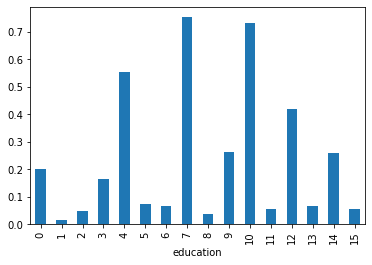

In [21]:
df.groupby('education').income.mean().plot(kind='bar')


<AxesSubplot:xlabel='occupation'>

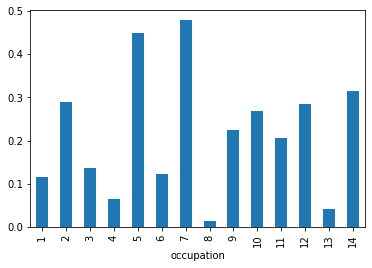

In [22]:
df.groupby('occupation').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

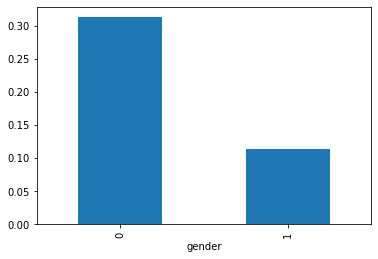

In [23]:
df.groupby('gender').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='relationship'>

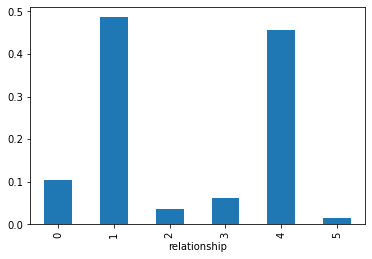

In [24]:
df.groupby('relationship').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='race'>

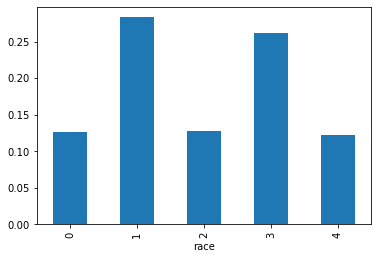

In [25]:
df.groupby('race').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='workclass'>

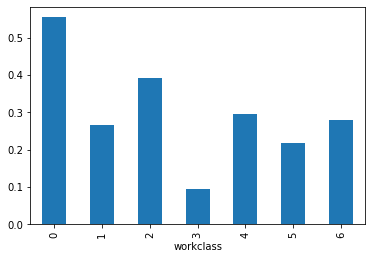

In [26]:
df.groupby('workclass').income.mean().plot(kind='bar')

# Logistic regression

In [28]:
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
df_y = pd.DataFrame(df.income)

In [29]:
reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [31]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

C:\Users\TzC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603189493433395
